# ML-Workflow

Für dieses Notebook verwenden wir zwei Datensätze von [Sendy Logistic](https://zindi.africa/competitions/sendy-logistics-challenge/data) (ein afrikanischer Bike-Taxi-Service). Die Problemstellung lautet:
"The dataset provided by Sendy includes order details and rider metrics based on orders made on the Sendy platform. The challenge is to predict the estimated time of arrival for orders from pick-up to drop-off."

Dazu gibt es zwei Datensätze im CSV-Format:
1. Daten zu den einzelnen Fahrten mit verschiedenen Attributen zu der tatsächlichen Dauer der Fahrt.
2. Details zu den Fahrern welche auf den Fahrten im Einsatz sind.

Hinweis: Dieses Notebook folgt in weiten Teilen diesem (sehr lesenswerten) [Blog-Post](https://heartbeat.fritz.ai/a-practical-guide-to-feature-engineering-in-python-8326e40747c8). 

## 1. Laden der Datensätze

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None # avoids some (false-positive) warnings

In [2]:
url = 'https://raw.githubusercontent.com/artyerokhin/zindy_logistics_challenge/master/Train.csv'
df_trips = pd.read_csv(url)
print(df_trips.shape)
df_trips.head()

(21201, 29)


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


Um Datensätze mit vielen Features übersichtlich darzustellen, hilft das Transponieren des DataFrames.

In [3]:
df_trips.head().T

,0,1,2,3,4
Order No,Order_No_4211,Order_No_25375,Order_No_1899,Order_No_9336,Order_No_27883
User Id,User_Id_633,User_Id_2285,User_Id_265,User_Id_1402,User_Id_1737
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,1
Personal or Business,Business,Personal,Business,Business,Personal
Placement - Day of Month,9,12,30,15,13
Placement - Weekday (Mo = 1),5,5,2,5,1
Placement - Time,9:35:46 AM,11:16:16 AM,12:39:25 PM,9:25:34 AM,9:55:18 AM
Confirmation - Day of Month,9,12,30,15,13
Confirmation - Weekday (Mo = 1),5,5,2,5,1


Auf Basis der folgenden Attributen bauen wir Features um das Label `Time from Pickup to Arrival` vorherzusagen:

In [4]:
selected_columns = ["Personal or Business", "Placement - Weekday (Mo = 1)",
                    "Distance (KM)","Temperature", "Time from Pickup to Arrival",
                    "Rider Id"]

df_trips_selection = df_trips[selected_columns]
df_trips_selection.head()

,Personal or Business,Placement - Weekday (Mo = 1),Distance (KM),Temperature,Time from Pickup to Arrival,Rider Id
0,Business,5,4,20.4,745,Rider_Id_432
1,Personal,5,16,26.4,1993,Rider_Id_856
2,Business,2,3,NaN,455,Rider_Id_155
3,Business,5,9,19.2,1341,Rider_Id_855
4,Personal,1,9,15.4,1214,Rider_Id_770


Der zweite Datensatz enthält Details über die Fahrer:

In [5]:
url = "https://raw.githubusercontent.com/artyerokhin/zindy_logistics_challenge/master/Riders.csv"
df_riders = pd.read_csv(url)
df_riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In diesem Datensatz interessiert uns nur das Attribut `Average_Rating`, welches die durchschnittliche Bewertung des Fahrers auf seinen bisherigen Trips angibt. Das Attribut `Rider Id` behalten wir ebenfalls, da wir es für die Verknüpfung mit dem anderen Datensatz benötigen.

Im nächsten Schritt werden die zwei Datensätze mit einem `merge` über das gemeinsame Attribute `Rider Id` zusammengeführt.

In [6]:
data = pd.merge(df_trips_selection, df_riders, on='Rider Id')
data.head()

,Personal or Business,Placement - Weekday (Mo = 1),Distance (KM),Temperature,Time from Pickup to Arrival,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Business,5,4,20.4,745,Rider_Id_432,1637,1309,13.8,549
1,Personal,5,20,24.5,2886,Rider_Id_432,1637,1309,13.8,549
2,Business,5,6,24.7,2615,Rider_Id_432,1637,1309,13.8,549
3,Personal,2,18,15.2,2986,Rider_Id_432,1637,1309,13.8,549
4,Personal,2,7,19.2,1602,Rider_Id_432,1637,1309,13.8,549


## 2. Date Preparation und Feature Engineering

Im ersten Schritt schauen wir uns die Daten kurz an:

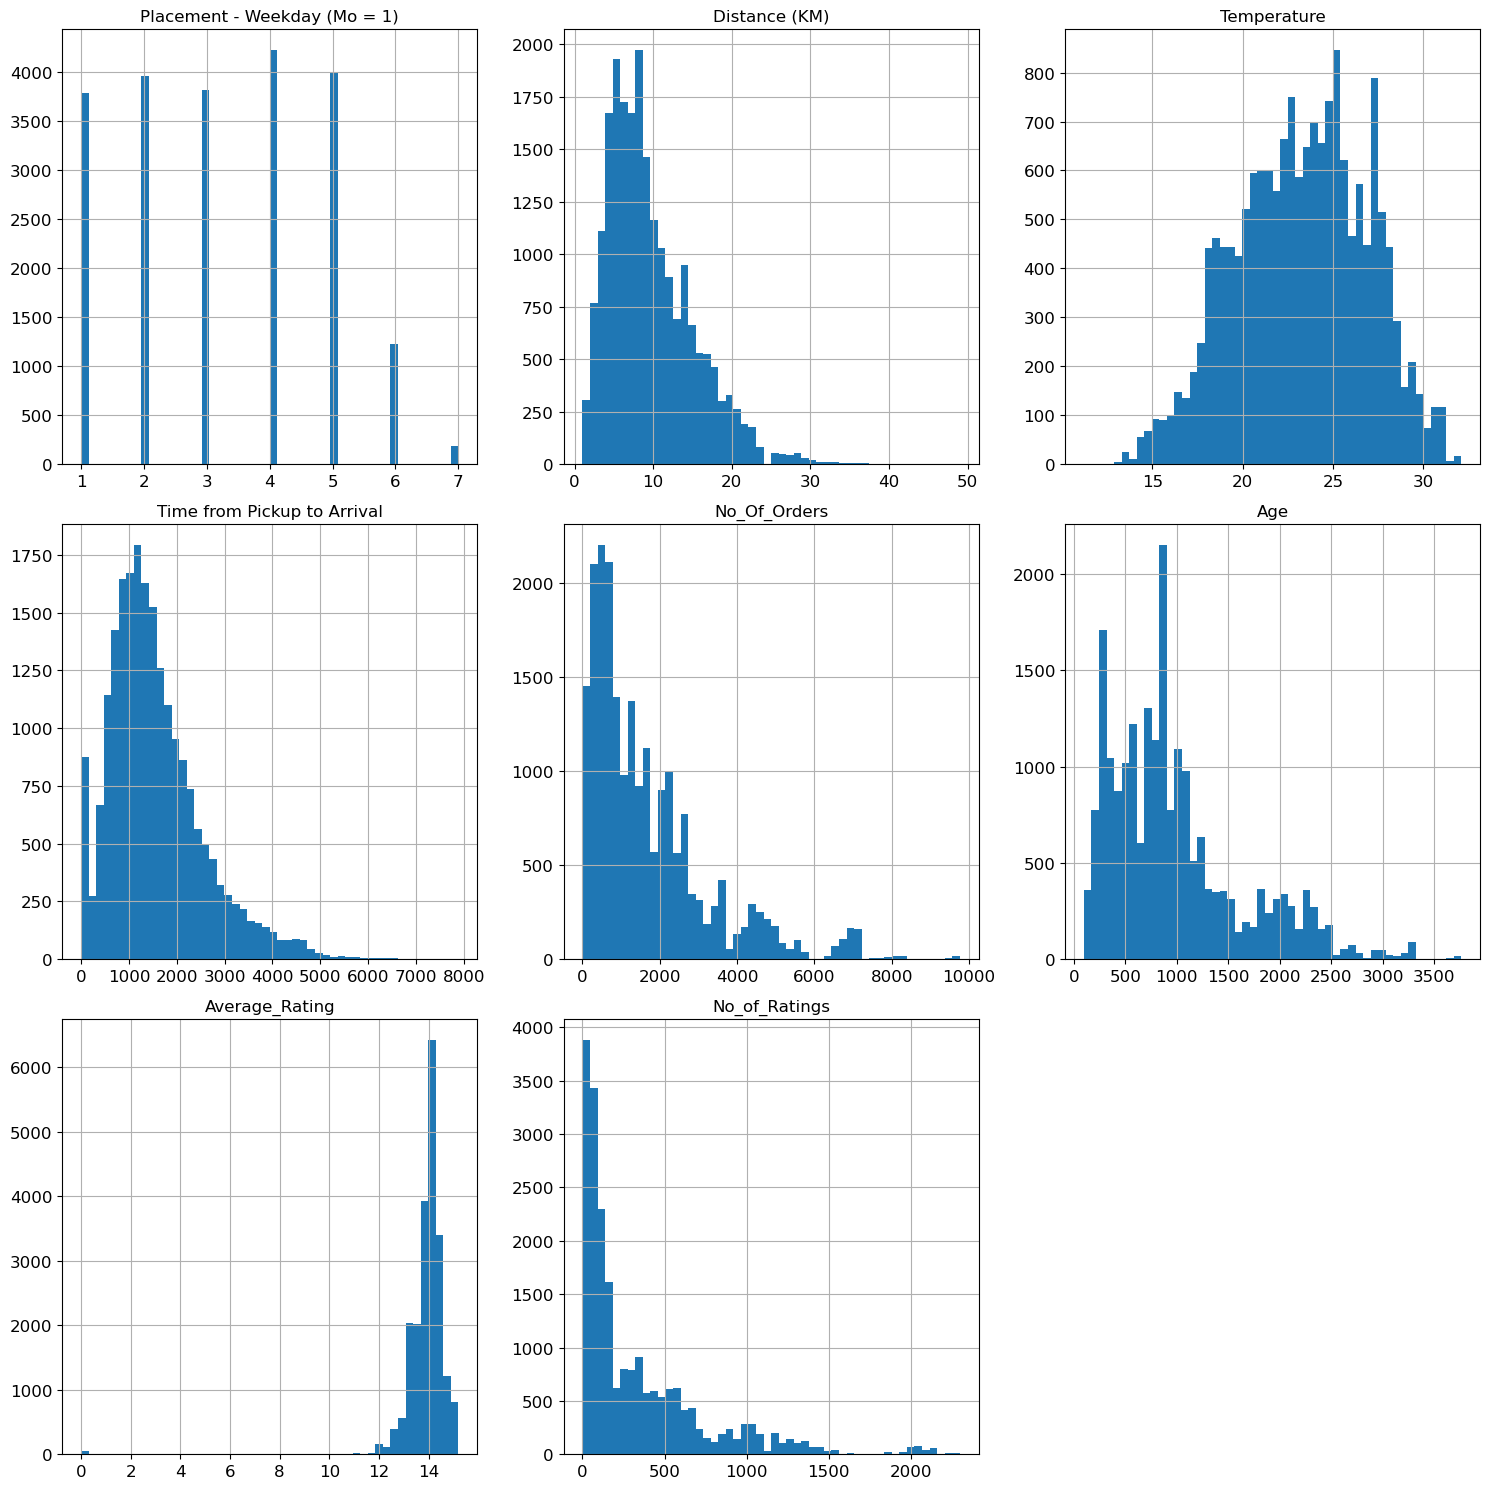

In [7]:
import matplotlib.pyplot as plt

data.hist(figsize=(15, 15), bins=50, xlabelsize=12, ylabelsize=12)
plt.tight_layout() # optional to improve presentation of plots (overlap of axis labels)
plt.show()

Die Attribute `Personal or Business` und `Placement - Weekday (Mo = 1)` sind beide kategorisch, d.h. sie können nicht direkt als Feature genutzt werden, sondern müssen mit Hifle von "one-hot-encoding" transformiert werden:

In [8]:
one_hot_feature_1 = pd.get_dummies(data["Personal or Business"])
one_hot_feature_1.head()

,Business,Personal
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [9]:
one_hot_feature_2 = pd.get_dummies(data["Placement - Weekday (Mo = 1)"], prefix="weekday")
one_hot_feature_2.head()

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


Jede Spalte entspricht hier einem Wochentag.
Als nächstes werden diese Features wieder dem DataFrame hinzugefügt:

In [10]:
data_all = pd.concat([data, one_hot_feature_1, one_hot_feature_2], axis=1)
data_all.head()

,Personal or Business,Placement - Weekday (Mo = 1),Distance (KM),Temperature,Time from Pickup to Arrival,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Business,Personal,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,Business,5,4,20.4,745,Rider_Id_432,1637,1309,13.8,549,1,0,0,0,0,0,1,0,0
1,Personal,5,20,24.5,2886,Rider_Id_432,1637,1309,13.8,549,0,1,0,0,0,0,1,0,0
2,Business,5,6,24.7,2615,Rider_Id_432,1637,1309,13.8,549,1,0,0,0,0,0,1,0,0
3,Personal,2,18,15.2,2986,Rider_Id_432,1637,1309,13.8,549,0,1,0,1,0,0,0,0,0
4,Personal,2,7,19.2,1602,Rider_Id_432,1637,1309,13.8,549,0,1,0,1,0,0,0,0,0


`Time from Pickup to Arrival` ist das Label welches vorhergesagt werden soll. Da es numerisch ist, handelt es sich um ein Regressionsproblem (keine Klassifikation).

Als nächstes unterteilen wir die Daten in Train- und Testdaten:

In [11]:
from sklearn.model_selection import train_test_split

df_X = data_all.drop(columns = ["Personal or Business", "Placement - Weekday (Mo = 1)",
                            "Time from Pickup to Arrival", "Rider Id"])
df_y = data_all["Time from Pickup to Arrival"]
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)
X_train.head()

,Distance (KM),Temperature,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Business,Personal,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
9470,21,22.1,730,1113,14.4,156,1,0,0,0,0,0,0,1,0
20042,12,NaN,3670,2015,13.5,1193,1,0,0,0,0,0,1,0,0
1889,3,NaN,928,494,14.3,43,1,0,0,1,0,0,0,0,0
18964,6,23.1,582,273,13.2,42,1,0,0,0,0,0,1,0,0
6894,2,16.8,243,911,14.1,84,1,0,0,0,0,1,0,0,0


Im nächsten Schritt schauen wir uns die fehlende Datenfelder an. Dazu schauen wir wie oft einzelne Felder fehlen:

In [12]:
X_train.isna().sum()

Distance (KM)        0
Temperature       3500
No_Of_Orders         0
Age                  0
Average_Rating       0
No_of_Ratings        0
Business             0
Personal             0
weekday_1            0
weekday_2            0
weekday_3            0
weekday_4            0
weekday_5            0
weekday_6            0
weekday_7            0
dtype: int64

Das Attribut `Temperature` fehlt in vielen Datenpunkten.
Daher ersetzen wir die fehlenden Felder mit dem Durchschnittswert der vorhandenen Felder.

In [13]:
temperature_mean = X_train['Temperature'].mean()
print(temperature_mean)
X_train['Temperature'] = X_train['Temperature'].fillna(temperature_mean)

23.264873699851414


In [14]:
X_train.isna().sum()

Distance (KM)     0
Temperature       0
No_Of_Orders      0
Age               0
Average_Rating    0
No_of_Ratings     0
Business          0
Personal          0
weekday_1         0
weekday_2         0
weekday_3         0
weekday_4         0
weekday_5         0
weekday_6         0
weekday_7         0
dtype: int64

Alle Attribute müssen vor dem Training des ML-Modells noch normalisiert werden. Dafür nutzen wir eine Methode aus sklearn. 

In [15]:
X_train.columns

Index(['Distance (KM)', 'Temperature', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'Business', 'Personal', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weekday_7'],
      dtype='object')

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 2.04002188, -0.36232115, -0.61369115, ..., -0.47880344,
         4.03808401, -0.09188762],
       [ 0.44304087,  0.        ,  1.25536701, ...,  2.08853971,
        -0.2476422 , -0.09188762],
       [-1.15394014,  0.        , -0.48781581, ..., -0.47880344,
        -0.2476422 , -0.09188762],
       ...,
       [ 0.79792554, -0.79777574, -0.30981027, ..., -0.47880344,
        -0.2476422 , -0.09188762],
       [-0.26672847, -0.26900945,  1.10342657, ..., -0.47880344,
        -0.2476422 , -0.09188762],
       [-0.44417081, -0.14459385,  0.25408585, ..., -0.47880344,
        -0.2476422 , -0.09188762]])

## 3. Model Training

Nach diesen Schritten könne wir jetzt eine lineare Regression auf den Daten trainieren:

In [17]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_scaled, y_train);

## 4. Evaluation

Bevor wir das Modell auf den Testdaten testen, gibt es einiges zu beachten:

- Zuerst entfernen wir aus den Testdaten alle Datenpunkte welche ein N/A enthalten (Hinweis: Beim Testen werden die fehlenden Werte nicht aufgefüllt, wie beim Training).

In [18]:
X_test = X_test.dropna()
X_test.shape

(3375, 15)

- Da wir die Datenpunkte nur aus `X_test` entfernt haben, müssen die übrig gebliebenen Punkte auch aus `y_test` ausgewählt werden:

In [19]:
y_test = y_test[X_test.index]
y_test.shape

(3375,)

- Als nächstes nehmen wir den oben erstellten Skalierer um auch die Testdaten zu skalieren:

In [20]:
X_test_scaled = scaler.transform(X_test)

- Letztendlich können wir auf den Testdaten vorhersagen und den MSE berechnen:

In [21]:
from sklearn.metrics import mean_squared_error

predictions = reg.predict(X_test_scaled)
mse =  mean_squared_error(y_test, predictions)
print("Mean squared error (MSE) auf Testdaten: %.2f" % mse)

Mean squared error (MSE) auf Testdaten: 613117.61


In [22]:
import math
math.sqrt(mse)

783.0182668256746

Wie wir sehen, liegen wir im Schnitt 786 Sekunden (= 13 Minuten) daneben. Schauen wir uns kurz die Verteilung des Labels an, um dies einzuordnen:

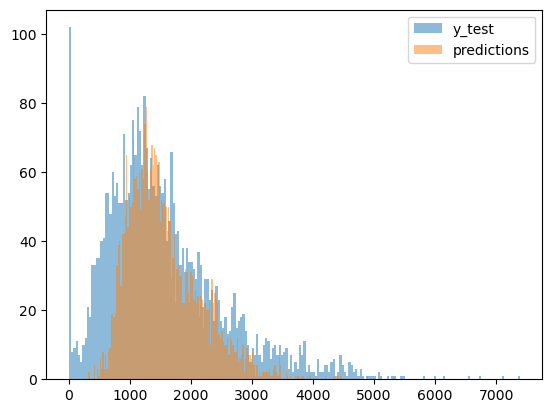

In [23]:
plt.hist(y_test, bins=200, alpha=0.5, label='y_test')
plt.hist(predictions, bins=200, alpha=0.5, label='predictions')

plt.legend(loc='upper right')
plt.show()

Im Vergleich zu diesem Wertebereich ist die mittlere Vorhersagegenauigkeit einigermaßen okay. Würden wir noch mehr Features aus den gegebenen Daten bauen, könnten wir noch um einiges besser werden.